In [1]:
import random
import numpy as np
from importlib import reload
import torch
import int_to_board
reload(int_to_board)

import game
reload(game)

import plotting
reload(plotting)

import mcts.mcts
reload(mcts.mcts)

import mcts.networks
reload(mcts.networks)

import mcts.agent
reload(mcts.agent)

from game import Patterns
from plotting import PatternPlotter

from mcts.mcts import Tree, Node
from mcts.networks import PatternsNet
from mcts.agent import Agent

rseed = 12387623
random.seed(rseed)
torch.manual_seed(rseed)
np.random.seed(rseed)

my_device = torch.device("cpu")

[104, 105, 106]
106


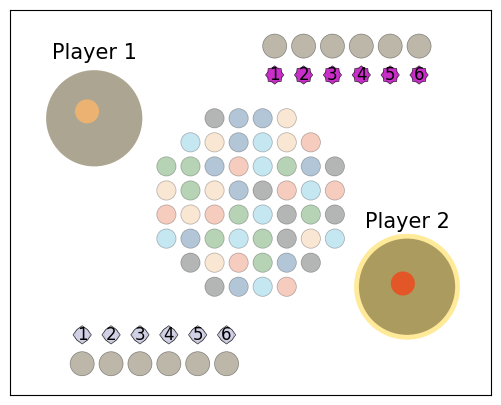

[104, 105]
104


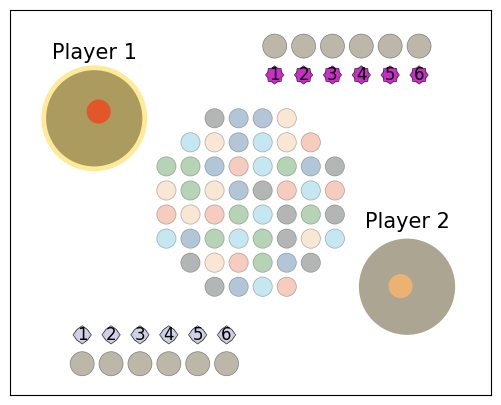

[26, 22, 29, 19, 25, 38, 32, 35, 41, 0, 3, 12, 9, 15, 6, 50, 43, 46, 28, 18, 31, 21, 34, 40, 24, 37, 14, 5, 2, 11, 17, 8, 42, 45, 49, 20, 27, 33, 23, 36, 30, 39, 4, 1, 10, 7, 13, 16, 48, 47, 51, 44]
23


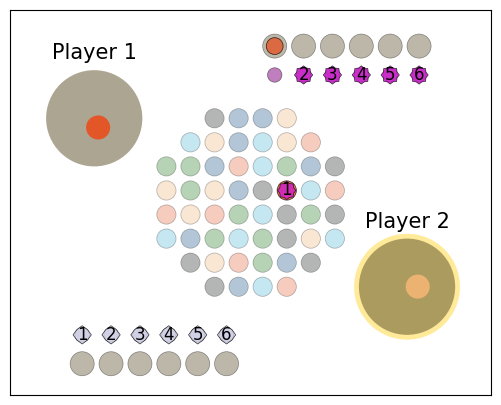

[26, 22, 29, 19, 25, 38, 32, 35, 41, 0, 3, 12, 9, 15, 6, 50, 43, 46, 28, 18, 31, 21, 34, 40, 24, 37, 14, 5, 2, 11, 17, 8, 42, 45, 49, 20, 27, 33, 36, 30, 39, 4, 1, 10, 7, 13, 16, 48, 47, 51, 44]
27


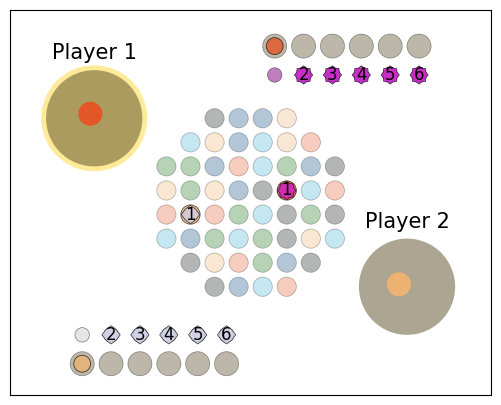

[31, 15, 22, 24, 83, 67, 74, 76]
76


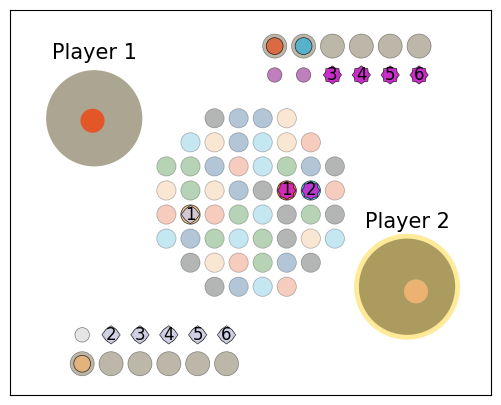

[19, 26, 35, 28, 71, 78, 87, 80]
80


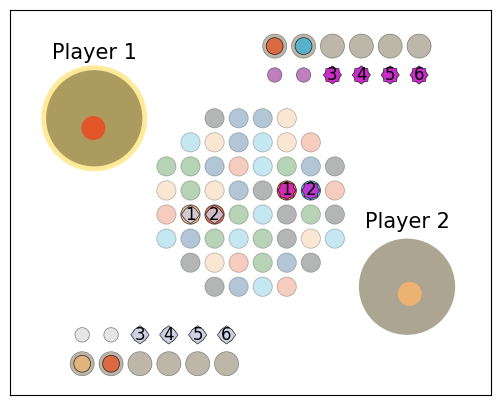

[31, 15, 22, 83, 67, 74, 77, 84, 68]
77


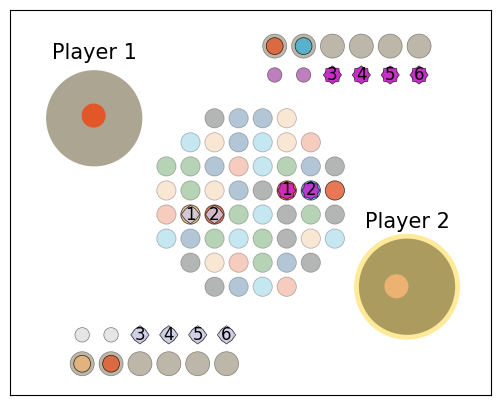

[19, 26, 35, 71, 78, 87, 81, 72, 88]
26


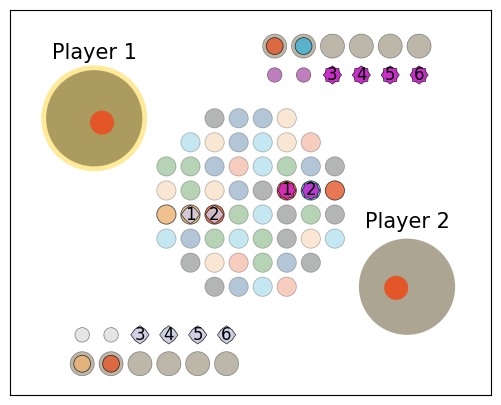

[22, 17, 31, 15, 33, 74, 69, 83, 67, 85, 84, 68]
67


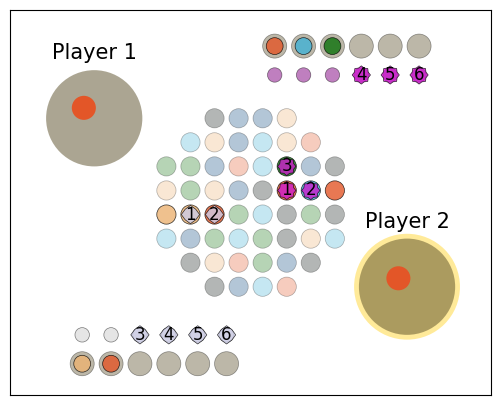

[29, 20, 36, 71, 86, 87, 70, 81, 72, 88]
81


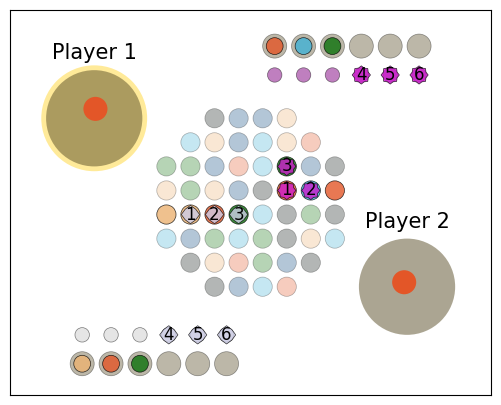

[33, 31, 22, 17, 74, 69, 83, 85, 84, 68, 66, 68, 60]
60


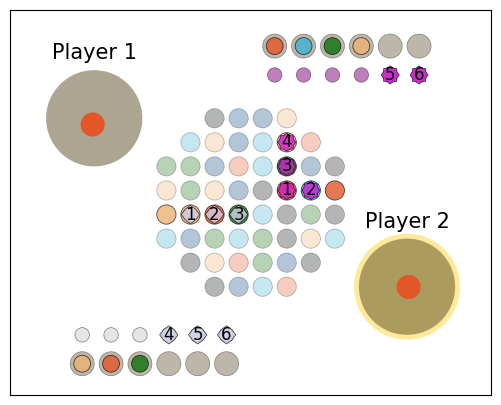

[20, 36, 71, 86, 87, 70, 72, 88, 89, 73, 82]
88


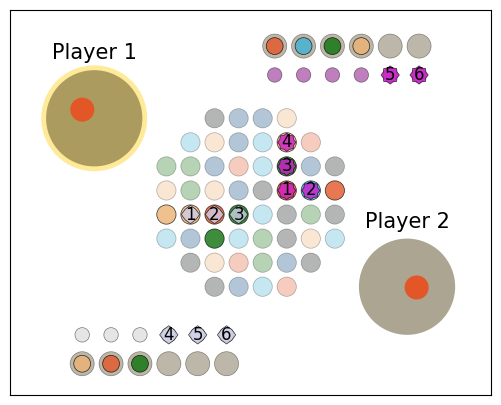

[33, 31, 22, 17, 61, 59, 55, 74, 69, 83, 85, 84, 68, 66, 68]
66


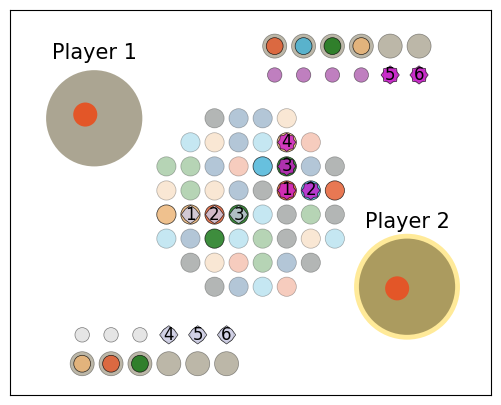

[20, 71, 86, 87, 70, 72, 82, 95, 87, 73, 89]
20


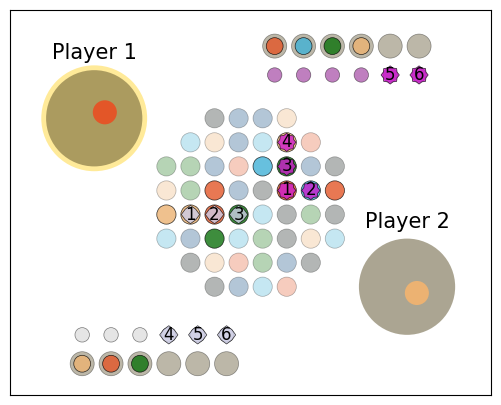

[33, 31, 22, 17, 61, 59, 55, 85, 83, 74, 69, 74, 84, 59, 65, 68, 68]
83


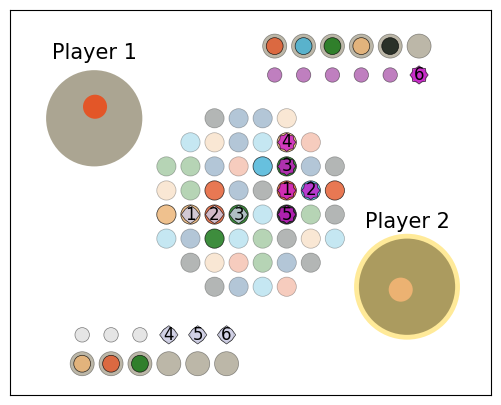

[19, 34, 35, 18, 71, 86, 87, 70, 71, 73, 64, 82, 95, 87, 73, 89]
82


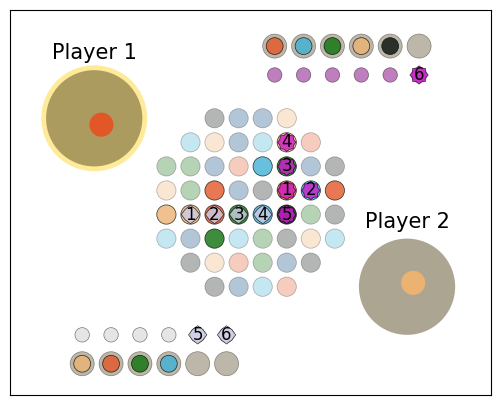

[33, 22, 17, 61, 59, 55, 85, 74, 69, 65, 84, 68, 59, 91, 84, 68]
59


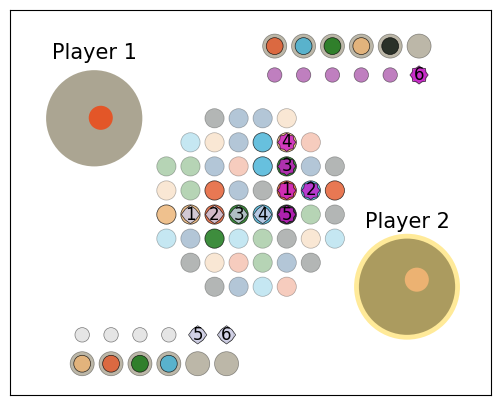

[19, 34, 35, 18, 71, 86, 87, 70, 71, 73, 64, 90, 95, 87, 73, 89]
19


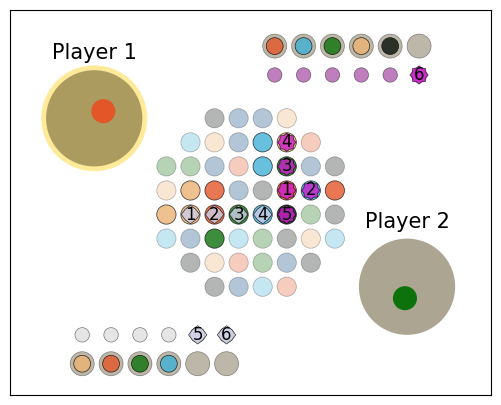

[33, 22, 17, 61, 55, 85, 74, 69, 54, 84, 65, 68, 58, 91, 84, 68]
91


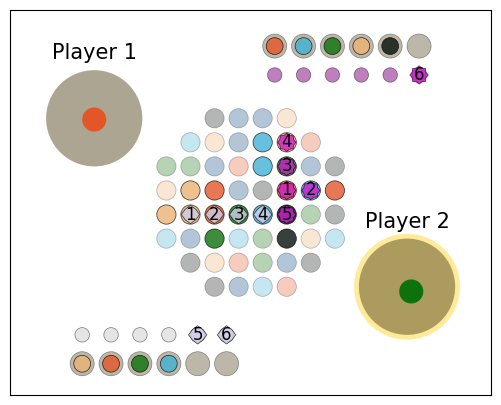

[37, 43, 21, 35, 87, 86, 63, 70, 73, 64, 90, 95, 87, 73, 89]
87


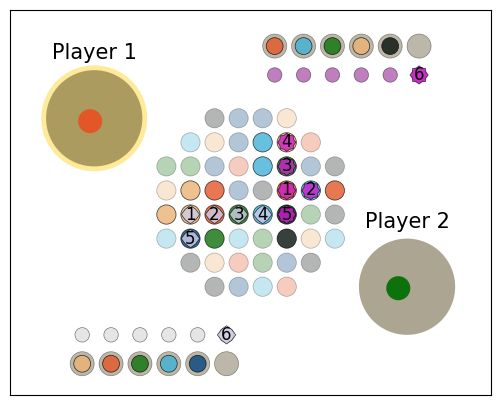

[33, 22, 17, 61, 55, 85, 74, 69, 54, 84, 65, 68, 58, 90, 84, 92, 98, 68]
58


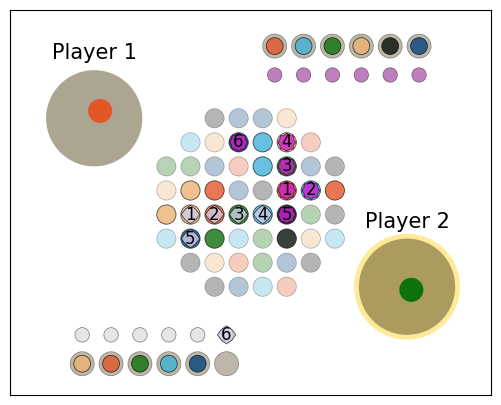

[37, 43, 21, 86, 63, 70, 73, 64, 90, 94, 86, 95, 73, 89]
86


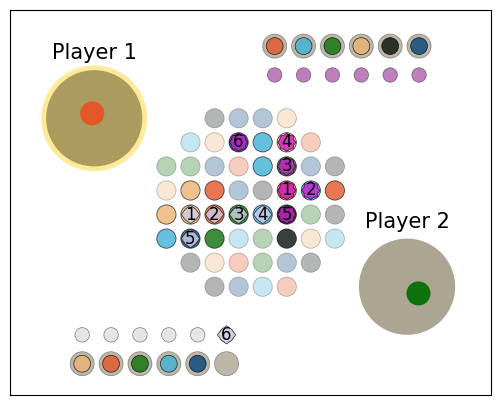

[33, 22, 17, 61, 55, 85, 74, 69, 65, 84, 68, 54, 90, 84, 92, 98, 65, 57, 53, 68]
53


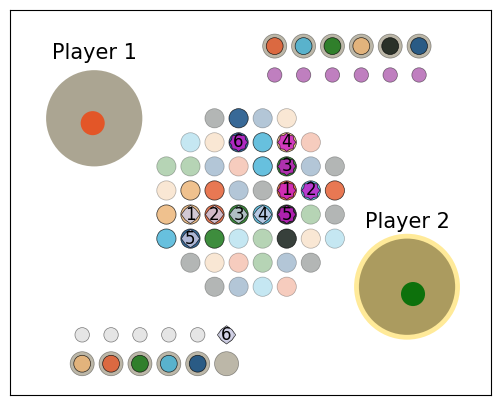

[37, 43, 21, 63, 70, 73, 64, 90, 94, 95, 73, 89]
94


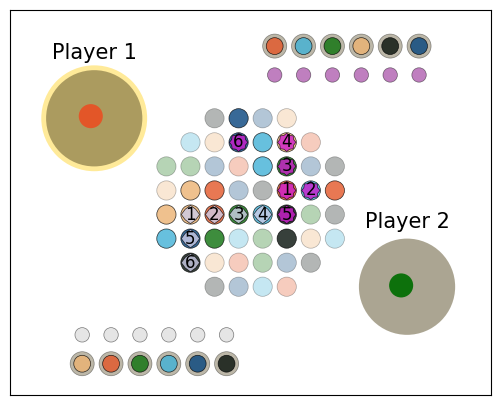

[33, 22, 17, 61, 55, 85, 74, 69, 65, 84, 68, 54, 90, 84, 92, 98, 65, 52, 57, 54, 68]
61


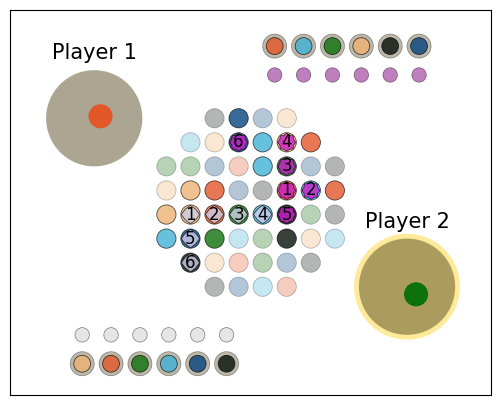

[37, 43, 21, 63, 70, 73, 64, 90, 95, 95, 73, 89]
90


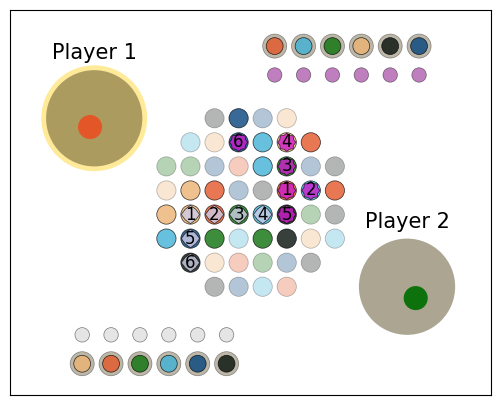

[33, 16, 22, 17, 55, 85, 68, 74, 69, 65, 84, 68, 54, 84, 92, 98, 65, 52, 57, 54, 68]
68


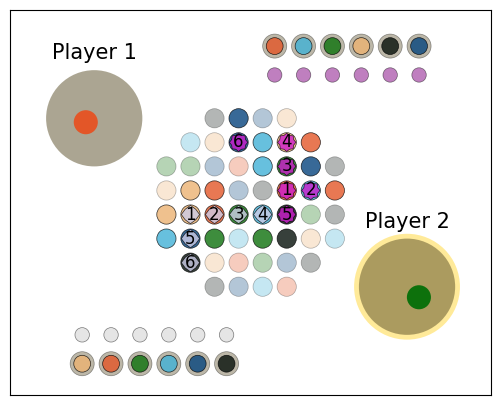

[37, 43, 21, 45, 63, 70, 73, 64, 95, 89, 95, 73, 97]
97


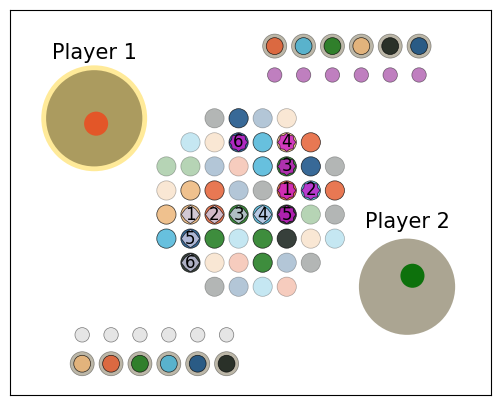

[33, 22, 17, 55, 85, 74, 69, 65, 84, 54, 84, 92, 98, 57, 54, 69, 65, 52]
57


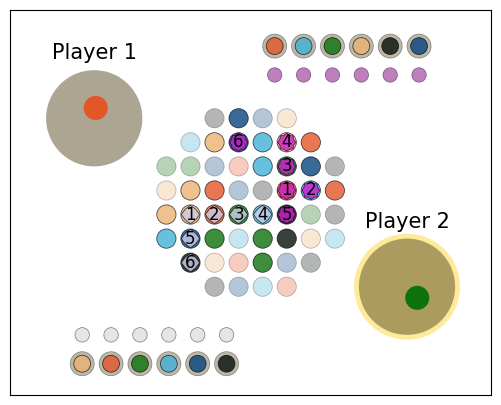

[50, 43, 21, 46, 37, 44, 63, 70, 73, 64, 95, 102, 95, 98, 73, 89, 96]
102


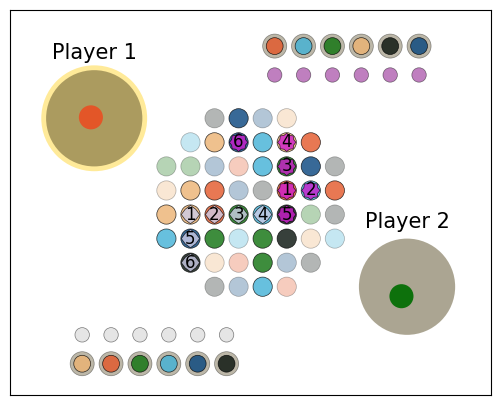

[33, 22, 17, 56, 52, 55, 64, 85, 74, 69, 65, 84, 54, 84, 92, 98, 54, 69, 65, 52]
54


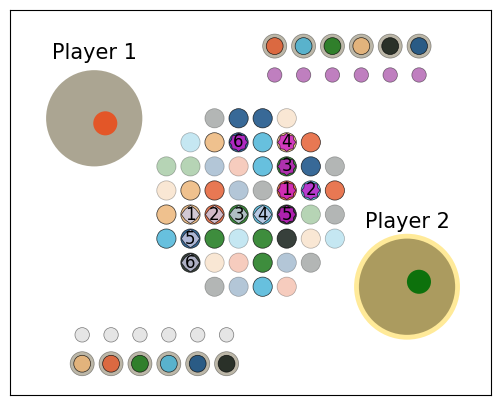

[43, 21, 46, 37, 44, 63, 70, 73, 64, 103, 101, 95, 95, 98, 73, 89, 96]
64


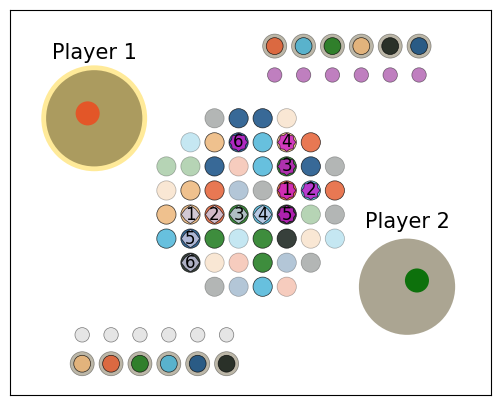

[33, 22, 17, 56, 52, 55, 85, 74, 69, 65, 84, 84, 92, 98, 52, 69, 55]
17


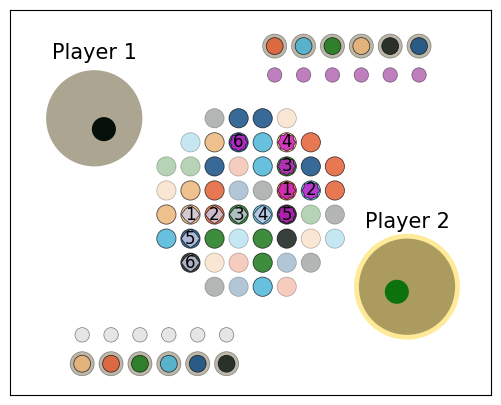

[43, 21, 46, 37, 44, 63, 70, 73, 103, 101, 95, 63, 95, 98, 73, 89, 96]
44


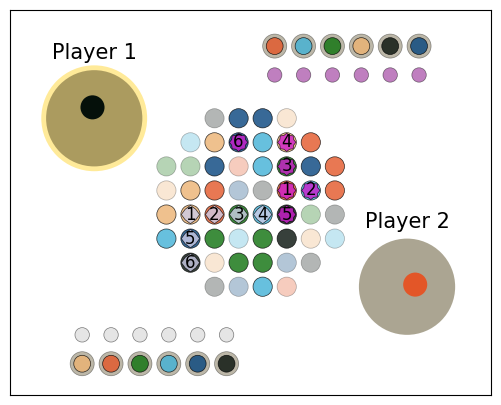

[32, 40, 46, 56, 52, 55, 85, 74, 65, 84, 84, 92, 98, 52, 55]
52


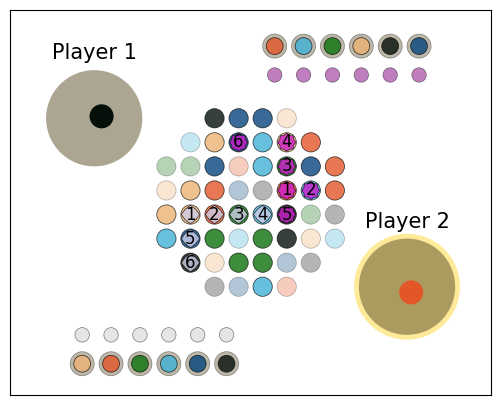

[21, 63, 70, 73, 103, 101, 95, 63, 95, 98, 101, 73, 89]
63


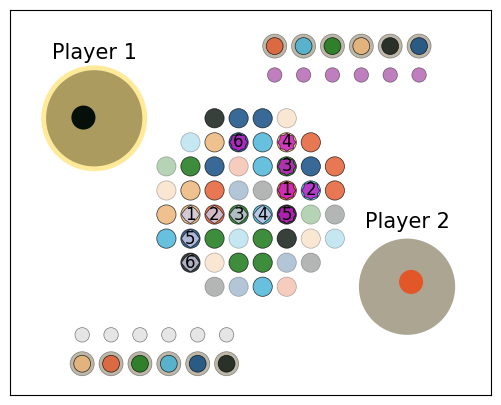

[32, 40, 46, 55, 56, 85, 74, 65, 84, 84, 92, 98, 55]
40


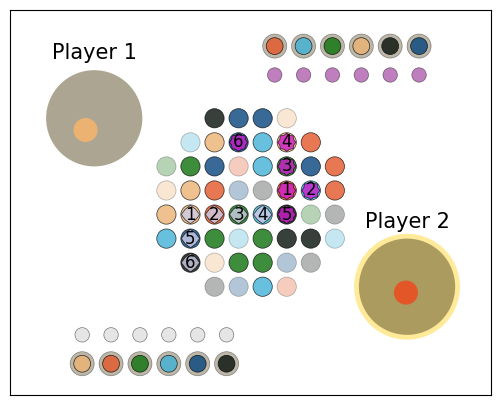

[21, 70, 73, 103, 101, 95, 95, 98, 56, 62, 101, 73, 89]
95


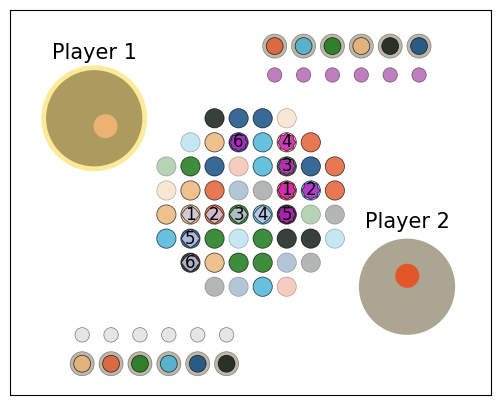

[4, 3, 56, 55, 85, 74, 65, 84, 99, 93, 84, 98, 55]
55


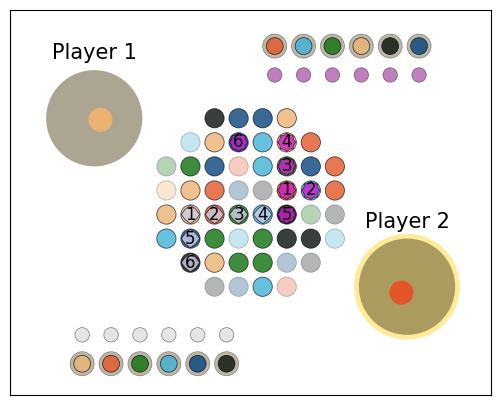

[21, 100, 70, 73, 103, 101, 98, 56, 62, 101, 73, 89]
100


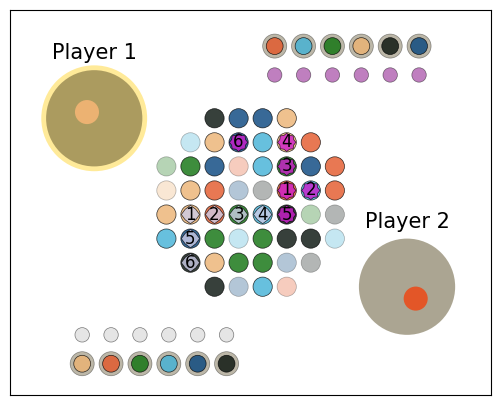

[4, 56, 85, 74, 65, 84, 99, 93, 84, 98]
85


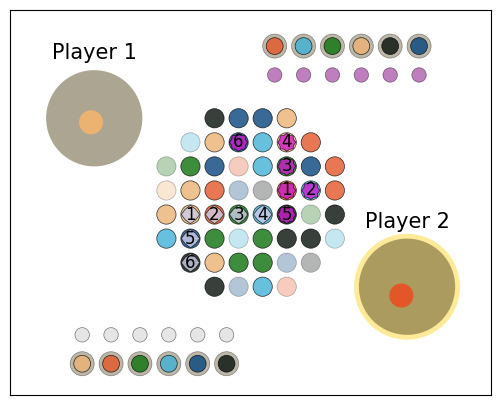

[21, 70, 73, 103, 101, 101, 98, 56, 62, 101, 73, 89]
101


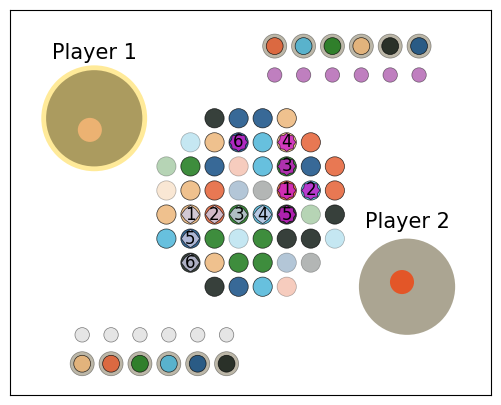

[4, 56, 74, 65, 84, 99, 93, 84, 98]
65


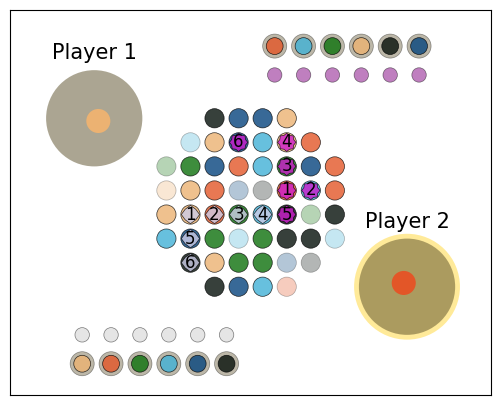

[70, 103, 98, 56, 62, 73, 89]
98


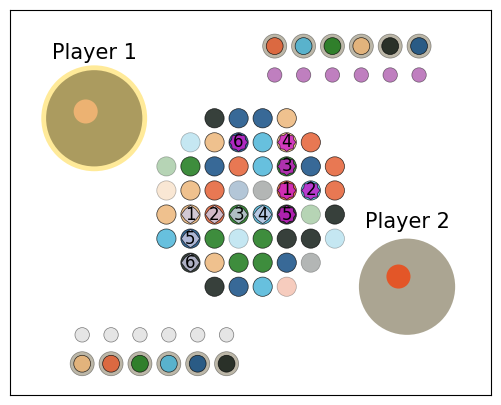

[56, 74, 84, 99, 93, 84]
93


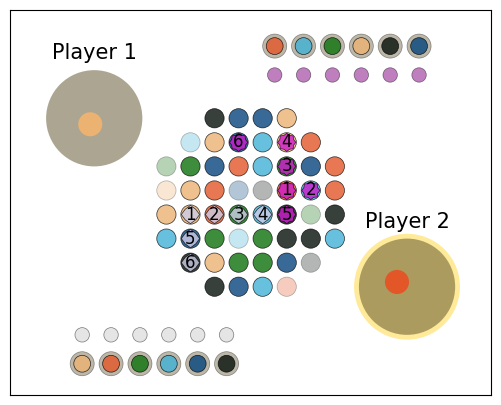

[70, 103, 99, 103, 56, 62, 73, 89]
73


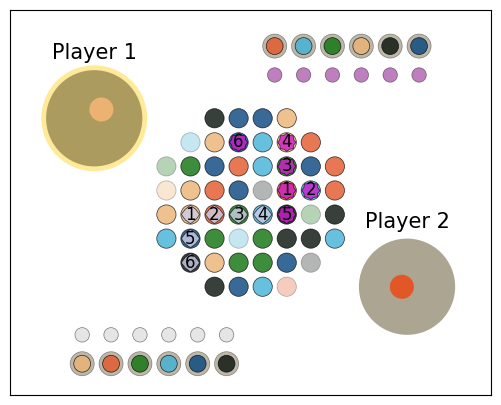

[56, 74, 84, 99, 84]
99


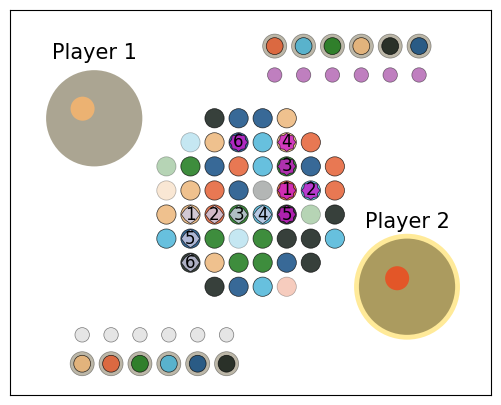

[70, 103, 103, 74, 56, 62, 89]
62


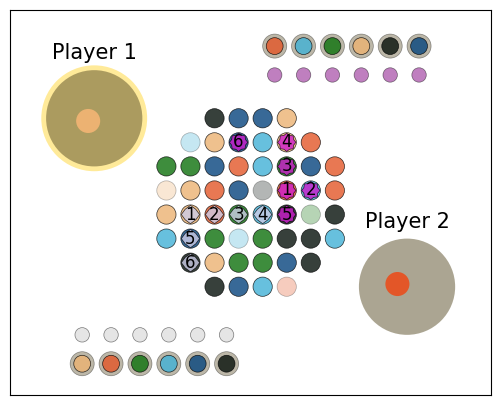

[56, 74, 84, 84]
74


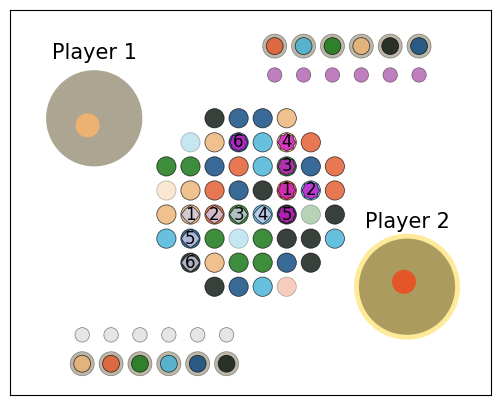

[70, 103, 103, 89, 56, 70]
103


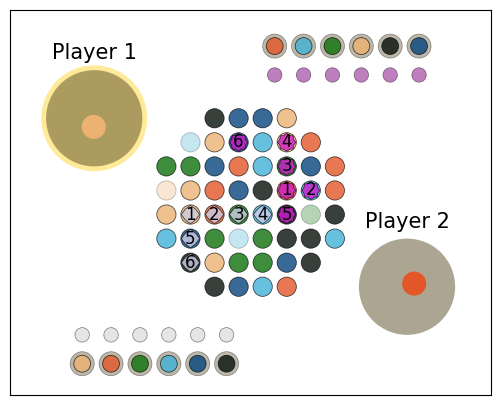

[56, 84, 84]
84


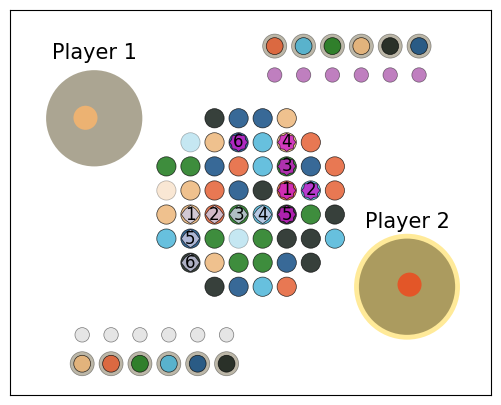

[70, 89, 56, 70]
70


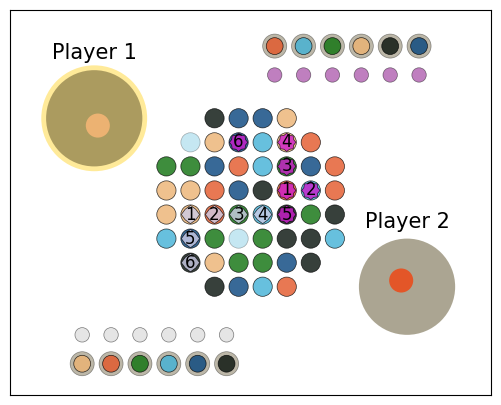

[56]
56


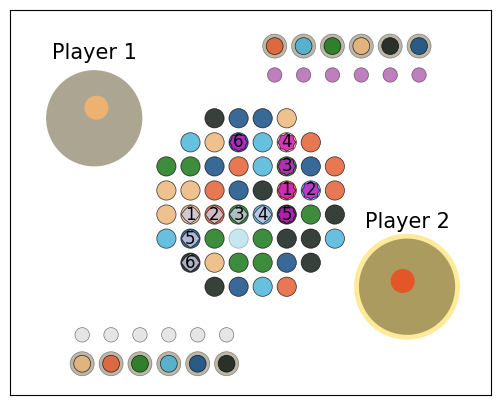

[89]
89


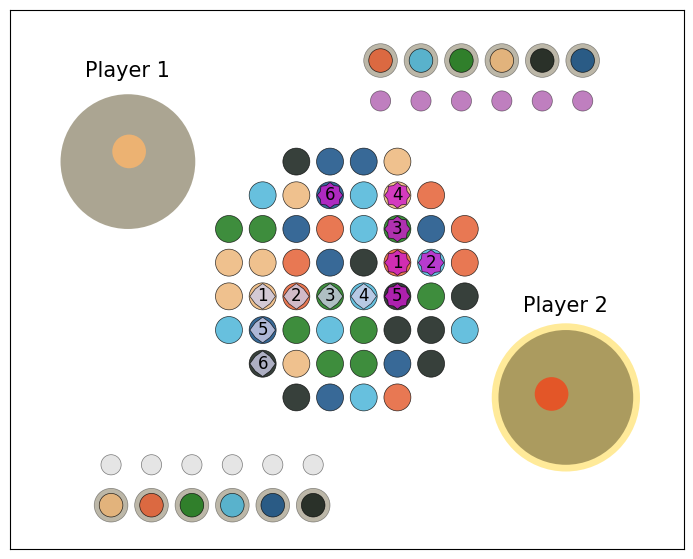

In [2]:
# test the new game and the is terminal stuff:
game = Patterns()

while True:
    actions = game.get_actions()
    print(actions)
    action = random.choice(actions)
    print(action)
    is_terminal, result = game.step(action)

    if is_terminal:
        break

    pplotter = PatternPlotter(game)
    pplotter.plot(fig_size=(7, 5))

pplotter = PatternPlotter(game)
pplotter.plot()

In [ ]:
jack = {1, 2, 3}
jill = {2, 5}
jon = {6}
james = jack - jill
james -= jon
jack, jill, jon, james


In [ ]:
game.passive_orthogonal_groups, game.active_orthogonal_groups

In [ ]:
my_network = PatternsNet(
    in_channels=102, # 102 for the number of state planes: 18 for tokens, 72 for order, 12 for bowl tokens
    out_channels=64,
)

my_agent = Agent(
    agent_id='1', 
    network = my_network,
    device = my_device,
    num_trees = 10, 
    explore_steps=200, 
    target_games=10,
    selection_temperature=1.0
)

In [ ]:
%prun my_agent.run_games()

In [ ]:
my_node = my_agent.trees[6].get_leaf_node()
paction = my_node.parent_action_arg

parent_node = my_node.parent
parent_game = parent_node.game
pplotter = PatternPlotter(my_node.game)
pplotter_parent = PatternPlotter(parent_game)
pplotter.plot()
pplotter_parent.plot()


In [ ]:
parent_game.passive_flipping_groups

In [ ]:
parent_node.possible_actions[paction]


In [ ]:
action = 90
from int_to_board import location_to_coordinates

if action >= 104:
    print('false')
    
removed_location = location_to_coordinates[action % 52]
print(removed_location)

In [ ]:
parent_game.is_no_more_placing

In [ ]:
set_removed_location = set(removed_location)
color = parent_game.active_bowl_token if action < 52 else parent_game.active_board[removed_location]

# Placing moves, flipping moves of same color, flipping moves of different colors:
placing_locations = parent_game.passive_placing_groups[parent_game.passive_bowl_token]

# unless there are no more placing moves allowed:
if parent_game.is_no_more_placing:
    placing_locations = set()

same_color_flipping_locations = parent_game.passive_flipping_groups[color]

different_color_flipping_locations = set(location_to_coordinates[_loc - 52] for _loc in parent_game.passive_flipping_actions)
different_color_flipping_locations -= same_color_flipping_locations


In [ ]:
jim = {1: [2, 3, 4], 2: [5, 6], 3: [7, 8, 9, 10]}
jason = [_x for _key, _val in jim.items() for _x in _val if _key != 2]
jason

In [ ]:

# now determine how many of these are killed by the current action:
removed_orthogonal = orthogonal_neighbors[removed_location]

# take the removed location from each of the sets:
placing_locations -= set_removed_location
different_color_flipping_locations -= set_removed_location
same_color_flipping_locations -= set_removed_location

# remove the orthogonals of the location from the same color flipping moves and the placing moves IF
# they share a color only:
same_color_flipping_locations -= removed_orthogonal

if color == self.passive_bowl_token:
    placing_locations -= removed_orthogonal

# if there will be a single move remaining, the game is not terminal:
if len(placing_locations) + len(same_color_flipping_locations) + len(different_color_flipping_locations) > 0:
    return False

return True

In [ ]:
with torch.profiler.profile(
        activities=[
            torch.profiler.ProfilerActivity.CPU,
            torch.profiler.ProfilerActivity.CUDA,
        ],
        # schedule=torch.profiler.schedule(
        #     wait=1, warmup=1, active=2, repeat=1, skip_first=1
        # ),
    ) as prof:
        
    my_agent.run_games()

# prof.export_chrome_trace(f"test_profiler.json")

In [ ]:
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

In [ ]:
for _game in my_agent.completed_games[9]:
    print(_game.get_actions())
    print(_game.calculate_score())
    pplotter = PatternPlotter(_game, fig_size=(8, 5))
    pplotter.plot()

In [ ]:
my_agent.completed_games

In [ ]:
my_tree = Tree()

my_network = PatternsNet(
    in_channels=102, # 102 for the number of state planes: 18 for tokens, 72 for order, 12 for bowl tokens
    out_channels=64,
).to(my_device)

for it in range(200):
    print(f"--_-_-_-_-_-_-_-_-_-_-_")
    
    # flow to leaf:
    leaf_node = my_tree.get_leaf_node()

    # choose a random child of the leaf node, if not first visit:
    leaf_node = leaf_node.expand()

    # collect the actions that lead here:
    _climber = leaf_node
    _act = []
    
    while _climber.parent:
        _act.append(_climber.parent.possible_actions[_climber.parent_action_arg])
        _climber = _climber.parent
    
    leaf_tensor = leaf_node.get_tensor_state()
    tensor_stack = torch.stack([leaf_tensor])
    
    with torch.inference_mode():
        value_stack, policy_stack = my_network(tensor_stack.float().to(my_device))
    
    value_stack = value_stack.cpu().numpy()[0]
    policy_stack = policy_stack.cpu().numpy()[0]
    leaf_node.value_score = value_stack
    leaf_node.policy_vector = policy_stack[leaf_node.possible_actions]
    my_tree.back_propagate(leaf_node)

    # plot the leaf node, the root node, etc:
    print(f"Root Node:")
    root_plotter = PatternPlotter(my_tree.root_node.game, fig_size=(7, 4))
    root_plotter.plot()

    print(f"Leaf Node:")
    leaf_plotter = PatternPlotter(leaf_node.game, fig_size=(7, 4))
    leaf_plotter.plot()
    
    print(f"\nActions that lead here: {_act[::-1]}")
    print(f"\nThe active color order: {leaf_node.game.active_color_order}")
    print(f"\nThe passive color order: {leaf_node.game.passive_color_order}")
    print(f"--_-_-_-_-_-_-_-_-_-_-_\n\n\n")

In [ ]:
a1 = np.zeros((2, 2), dtype=int)
a2 = np.array(a1)
a1[0, 0] = 4
a1[0, 1] += 2
a2[1, 0] -= 5

a1, a2

In [ ]:
a1 = {'a': {1, 2, 3}}
a2 = dict(a1)
a1['b'] = [4, 5]
a1['a'].append(9)
a2['a'].append(10)
a1, a2

In [ ]:
my_dict = {'a': [2, 3], 'b': [4, 5]}
{_key: list(_val) for _key, _val in my_dict.items()}

In [ ]:
class class_checker:
    def __init__(self, clone_class=None):
        self.numpy_array = np.array([[1, 2, 3]])
        self.list = [[4, 5, 6]]
        self.val = 10
        self.bool = True
        self.set = {7, 8, 9}
        self.dict = {'a': 1, 'b': 2, 'c': 3}

        if clone_class is not None:
            self.clone(clone_class)

    def clone(self, another_class):
        self.numpy_array = np.array(another_class.numpy_array)
        self.list = another_class.list[:]
        self.val = another_class.val
        self.bool = another_class.bool
        self.set = set(another_class.set)
        self.dict = dict(another_class.dict)

    def print_attributes(self):
        print(self.numpy_array)
        print(self.list)
        print(self.val)
        print(self.bool)
        print(self.set)
        print(self.dict)
        

class1 = class_checker()
class2 = class_checker(class1)



In [ ]:
class1.numpy_array[0] *= 10
class2.numpy_array[1] *= 100

class1.list[0] *= 10
class2.list[1] *= 100

class1.val +=5
class2.val -= 50

class1.bool = True
class2.bool = False

class1.set.add(50)
class2.set.remove(7)

class1.dict[50] = 100
class2.dict['a'] = -1

class1.print_attributes()
print()
class2.print_attributes()

In [ ]:
jon = np.array([1, 2, 3])
jim = jon[1]
jon[1] *= 10
jim *= 100
jim, jon

In [ ]:
a1 = [1, 2, 3]
a2 = a1[:]
a1[0] *= 10
a2[1] *= 100

a1, a2

In [ ]:
my_tree = Tree()

my_network = PatternsNet(
    in_channels=102, # 102 for the number of state planes: 18 for tokens, 72 for order, 12 for bowl tokens
    out_channels=64,
).to(my_device)


In [ ]:
    
# flow to leaf:
leaf_node = my_tree.get_leaf_node()


In [ ]:
leaf_node = leaf_node.expand()


In [ ]:
leaf_node.game.turn_number

In [ ]:
leaf_node.value_score, leaf_node.policy_vector

In [ ]:
leaf_game = leaf_node.game
root_game =  my_tree.root_node.game

root_game.active_color_groups is leaf_game.active_color_groups

In [ ]:

leaf_tensor = leaf_node.get_tensor_state()
tensor_stack = torch.stack([leaf_tensor])

with torch.inference_mode():
    value_stack, policy_stack = my_network(tensor_stack.float().to(my_device))

value_stack = value_stack.cpu().numpy()[0]
policy_stack = policy_stack.cpu().numpy()[0]
leaf_node.value_score = value_stack
leaf_node.policy_vector = policy_stack[leaf_node.possible_actions]

In [ ]:
my_tree.back_propagate(leaf_node)

In [ ]:
np.array([np.inf] * 10, dtype=float)

In [ ]:
my_tree.root_node.game.turn_number

In [ ]:

# choose a random child of the leaf node, if not first visit:
leaf_node = leaf_node.expand()

# collect the actions that lead here:
_climber = leaf_node
_act = []

while _climber.parent:
    _act.append(_climber.parent.possible_actions[_climber.parent_action_arg])
    _climber = _climber.parent

leaf_tensor = leaf_node.get_tensor_state()
tensor_stack = torch.stack([leaf_tensor])

with torch.inference_mode():
    value_stack, policy_stack = my_network(tensor_stack.float().to(my_device))

value_stack = value_stack.cpu().numpy()[0]
policy_stack = policy_stack.cpu().numpy()[0]
leaf_node.value_score = value_stack
leaf_node.policy_vector = policy_stack[leaf_node.possible_actions]
my_tree.back_propagate(leaf_node)

# plot the leaf node, the root node, etc:
print(f"Root Node:")
root_plotter = PatternPlotter(my_tree.root_node.game, fig_size=(7, 4))
root_plotter.plot()

print(f"Leaf Node:")
leaf_plotter = PatternPlotter(leaf_node.game, fig_size=(7, 4))
leaf_plotter.plot()


print(f"\nActions that lead here: {_act[::-1]}")
print(f"\nThe active color order: {leaf_node.game.active_color_order}")
print(f"\nThe passive color order: {leaf_node.game.passive_color_order}")
print(f"--_-_-_-_-_-_-_-_-_-_-_\n\n\n")

In [ ]:
my_tree.root_node.children, my_tree.root_node.visit_count, my_tree.root_node.possible_actions, my_tree.root_node.value_score, my_tree.root_node.policy_vector

In [ ]:
jim = {1:2, 2:3, 3:4}
james = dict(jim)
jim[4] = 5
james[5] = 4
jim, james

In [ ]:
leaf_node.game.active_board, leaf_node.game.passive_board, leaf_node.parent_action_arg

In [ ]:
leaf_node.parent.game.active_board, leaf_node.parent.game.passive_board, leaf_node.parent.possible_actions[32]

In [ ]:
leaf_node.parent.game.active_color_groups

In [ ]:
leaf_node.parent.parent.parent.game.active_color_groups

In [ ]:
leaf_node.game.active_bowl_token, leaf_node.game.active_color_groups

In [ ]:
my_network = PatternsNet(
    in_channels=102, # 102 for the number of state planes: 18 for tokens, 72 for order, 12 for bowl tokens
    out_channels=64,
)

my_agent = Agent(
    agent_id='1', 
    network = my_network,
    device = my_device,
    num_trees = 1, 
    explore_steps=100, 
    target_games=1,
    selection_temperature=1.0
)

In [ ]:
my_agent.trees[0].root_node.value_score

In [ ]:
my_agent.run_games()

In [ ]:
my_patterns = Patterns()
still_placing = True

while True:
    print(f"Turn {my_patterns.turn_number}, for Player {my_patterns.player + 1}")
    print(f"Score is currently:")
    active_score, passive_score = my_patterns.calculate_score()
    
    p1_score = active_score if my_patterns.player == 0 else passive_score
    p2_score = active_score if my_patterns.player == 1 else passive_score
    
    print(f"Player 1: {p1_score} -- {p2_score}: Player 2")
    
    actions = my_patterns.get_actions() 
    print(f"Available actions are: \n{actions}")
    
    if my_patterns.is_no_more_placing is True and still_placing is True:
        still_placing = False
        print(f"###########################")
        print(f"ALERT: no more placing moves from now on!")
        print(f"###########################")
        
    action = random.choice(actions)
    print(f"action taken is: {action}")
    is_terminal, _result = my_patterns.step(action)

    if is_terminal:
        break
        
    for _col in range(6):
        if (my_patterns.active_color_order[_col] > 0) or (my_patterns.passive_color_order[_col] > 0):
            print(f"Color: {_col}")
            print(f"Active flipping groups: {my_patterns.active_flipping_groups[_col]}")
            print(f"Active placing groups: {my_patterns.active_placing_groups[_col]}")
            print(f"Passive flipping groups: {my_patterns.passive_flipping_groups[_col]}")
            print(f"Passive placing groups: {my_patterns.passive_placing_groups[_col]}\n")
            
    pattern_plotter = PatternPlotter(my_patterns, fig_size=(10, 7.5))
    pattern_plotter.populate_board()

print(f"Game finished! Result is: {_result}")

pattern_plotter.populate_board()

In [ ]:
print()
print(my_patterns.player, my_patterns.active_board, my_patterns.active_bowl_token, )

actions = my_patterns.get_actions()

print(f"Available actions are: {actions}\n")

action = random.choice(actions)

print(f"action taken is: {action}\n")

my_patterns.step(action)

print(my_patterns.player, my_patterns.active_board, my_patterns.active_bowl_token)

pattern_plotter = PatternPlotter(my_patterns, fig_size=(10, 7.5))
pattern_plotter.populate_board()

In [ ]:
def play_random_patterns(num_iterations: int) -> None:
    """ play a set number of random games
    """
    num_turns = [0] * num_iterations
    
    for it in range(num_iterations):
        patterns_game = Patterns()

        while True:
            actions = patterns_game.get_actions()
            action = random.choice(actions)
            is_terminal, result = patterns_game.step(action)
            
            if is_terminal:
                break
        num_turns[it] = patterns_game.turn_number

    return num_turns

In [ ]:
_res = play_random_patterns(10000)

In [ ]:
np.sum(_res) / 10000

In [ ]:
len({1, 2, 3})

In [ ]:
%prun play_random_patterns(10000)


In [ ]:
def test_set_minus(num_it):
    my_dict = {_num: set(range(100)) for _num in range(6)}

    for it in range(10000):
        for _col in range(6):
            my_dict[_col] -= {11}
            
def test_set_minus_2(num_it):
    my_dict = {_num: set(range(100)) for _num in range(6)}

    for it in range(10000):
        for _col in range(6):
            my_dict[_col] -= {11}

In [ ]:
%prun test_set_minus(100000)

In [ ]:
%prun test_set_minus_2(100000)


In [ ]:
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np

token_center = (0.0, 0.0)
outrad = 0.35
inrad = 0.28
num_points = 7
arc = 2. * np.pi / num_points

patch_coords_1 = [
    [token_center[0] + outrad * np.cos(arc * _it),
     token_center[1] + outrad * np.sin(arc * _it)]
    for _it in range(num_points)
]
                
patch_coords_2 = [
    [token_center[0] + inrad * np.cos((arc / 2) + arc * _it),
     token_center[1] + inrad * np.sin((arc / 2) + arc * _it)]
    for _it in range(num_points)
]

patch_coords = []
for p1, p2 in zip(patch_coords_1, patch_coords_2):
    patch_coords.append(p1)
    patch_coords.append(p2)
    
fig, ax = plt.subplots()
ax.add_patch(patches.Polygon(patch_coords, facecolor='red', edgecolor='black', linewidth=0.5))
# ax.add_patch(patches.Polygon(patch_coords_1))
# ax.add_patch(patches.Polygon(patch_coords_2))

ax.set_xlim([-2., 2.])
ax.set_ylim([-2., 2.])
ax.set_aspect('equal')

In [ ]:
import torch
from torch import nn
import math

In [ ]:

class BoardInitNet(nn.Module):
    """ initial CNN processing of the board representation:
    """
    def __init__(self,
                 in_channels: int = 3,
                 out_channels: int = 64,
                 ) -> None:
        super(BoardInitNet, self).__init__()

        self.init = nn.Sequential(
            # Gather all "local" information for each board spot (including stuff on top)
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.init(x)

In [ ]:
my_net = BoardInitNet()
input_tensor = torch.tensor(np.random.rand(1, 3, 8, 8)).float()
my_net(input_tensor).shape

In [ ]:
my_patterns.active_board


In [ ]:
my_one_hot = torch.nn.functional.one_hot(torch.tensor(my_patterns.active_board).long(), num_classes=18)

In [ ]:
torch.nn.functional.one_hot(torch.tensor(my_patterns.active_color_order).long() - 1, num_classes=6)


In [ ]:
my_tens = torch.empty((8, 8, 36), dtype=bool)
for _it, _order in enumerate(my_patterns.active_color_order):
    my_tens[:, :, _it * 6 + _order] = 1

my_tens.int().shape

In [ ]:
# the board is just a one hot encoded version of the numpy board:
board_tensor = torch.nn.functional.one_hot(torch.tensor(my_patterns.active_board).long(), num_classes=18)

# 36 channels for each player for color group: order mapping:
order_tensor = torch.empty((8, 8, 72), dtype=bool)
for _it, (active_order, passive_order) in enumerate(zip(my_patterns.active_color_order, my_patterns.passive_color_order)):
    order_tensor[:, :, _it * 6 + active_order] = 1
    order_tensor[:, :, 36 + _it * 6 + passive_order] = 1
    
# bowl tokens:
bowl_tensor = torch.empty((8, 8, 12), dtype=bool)
bowl_tensor[:, :, my_patterns.active_bowl_token] = 1
bowl_tensor[:, :, 6 + my_patterns.passive_bowl_token] = 1

newtens =  torch.cat([board_tensor, order_tensor, bowl_tensor], dim=-1)

In [ ]:
newtens

In [ ]:
newtens.shape

In [ ]:
72 + 18 + 12

In [ ]:
""" Value and Policy Neural Networks defined in PyTorch for use in the MCTS algorithm:

State input is 8x8x102, which completely describes the current markov state.

Note that if we ever move to using a transformer, it may not be necessary to continue storing the state in this way

We create a CNN for the board, and MLPs for the other states.

We want to munge the conv net on the board state and the state vectors early on...

For now, we do all the CNN resnet stuff, followed by the MLP fully connected layers
to blend the state with the image.
"""
import torch
from torch import nn
import math


class PatternsNet(nn.Module):
    """ Take in the initial munging of the board and player states, and perform standard resnet
    fun on it:
    """
    def __init__(self,
                 in_channels: int = 102,
                 out_channels: int = 64,
                 ) -> None:
        """ 102 in channels for patterns. 18 for color and player, 72 for color group order, 12 for bowl tokens.
         """
        super(PatternsNet, self).__init__()

        # initial processing layer: output size (samples, out_channels, 8, 8)
        self.input_layer = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        # Downsampling layers:
        self.down1 = ResidualLayer(in_channels=out_channels, stride=2)
        out_channels *= 2
        self.down2 = ResidualLayer(in_channels=out_channels, stride=2)
        out_channels *= 2

        # Standard resnet layers:
        self.standard1 = ResidualLayer(in_channels=out_channels, stride=1)
        self.standard2 = ResidualLayer(in_channels=out_channels, stride=1)

        # different heads:
        self.twoheadlayer = TwoHeadNet(in_channels=out_channels,
                                       value_out_channels=out_channels // 16,
                                       policy_out_channels=out_channels // 4,
                                       action_space=(106,))

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        """ pass the input through the initial conv layer, expanding input channels to the number
        of filters required, before passing through the residual blocks """
        x = self.input_layer(x)
        x = self.down2(self.down1(x))
        x = self.standard2(self.standard1(x))

        return self.twoheadlayer(x)


class TwoHeadNet(nn.Module):
    """ Two different heads, attached to resnet backbone:

    One head addresses the policy prediction (with action-space number of neurons)
    one head addresses the value prediction (with a single neuron output, scaled to -1, 1
    """
    def __init__(self,
                 in_channels: int,
                 value_out_channels: int,
                 policy_out_channels: int,
                 action_space: tuple = (106,)) -> None:
        super(TwoHeadNet, self).__init__()
        self.action_space = action_space

        # output is float between -1 and 1 estimating board state
        self.value_head = nn.Sequential(
            # final bespoke convolutional layer for value:
            nn.Conv2d(in_channels, value_out_channels, kernel_size=3, padding=1, stride=1),# bias=False),
            nn.BatchNorm2d(value_out_channels),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(output_size=(1, 1)),
            # squash to flat:
            nn.Flatten(),
            nn.Linear(in_features=value_out_channels, out_features=1),
            # squish to between -1 and 1 to estimate the result of the game:
            nn.Tanh(),
        )

        # output is logits for softmax to give distribution over action space
        self.policy_head = nn.Sequential(
            nn.Conv2d(in_channels, policy_out_channels, kernel_size=3, padding=1, stride=1),# bias=False),
            nn.BatchNorm2d(policy_out_channels),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(output_size=(1, 1)),
            nn.Flatten(),
            nn.Linear(in_features=policy_out_channels, out_features=math.prod(action_space)),
        )

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        """ produce both outputs """
        value_x = self.value_head(x)
        policy_x = self.policy_head(x).view((-1, *self.action_space))

        return value_x, policy_x


class ResidualLayer(nn.Module):
    """ Stick two residual basic blocks together, apply down-sampling as required:
    """
    def __init__(self,
                 in_channels: int = 128,
                 stride: int = 1) -> None:
        super(ResidualLayer, self).__init__()

        # The first block can be a down-sampling layer:
        self.basic_block_1 = ResidualBlock(in_channels=in_channels, stride=stride)
        self.basic_block_2 = ResidualBlock(in_channels=in_channels * stride, stride=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ basic_block_1 will return x + conv(x)
        """
        x1 = self.basic_block_1(x)
        return self.basic_block_2(x1)


class ResidualBlock(nn.Module):
    """ A residual block of a resnet.

    Note that channels in and out are assumed equal, to allow for addition with manipulation.
    """
    def __init__(self,
                 in_channels: int,
                 stride: int = 1) -> None:
        super(ResidualBlock, self).__init__()

        self.is_downsample = True if stride != 1 else False

        out_channels = stride * in_channels

        # first layer can be downsample:
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self.conv_2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels)
        )

        # if downsampling, also downsample the residual for consistent tensor size:
        if self.is_downsample:
            # skip block needs a 1x1 conv to increase in channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels),
            )

        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ conv block applied to x, with skip connection to allow for robust residual training """
        residual = x if not self.is_downsample else self.downsample(x)
        return self.relu(residual + self.conv_2(self.conv_1(x)))


In [ ]:
def get_tensor_state(game) -> torch.Tensor:
    """ Use the game state to form a torch tensor that can be used to eval the position

    Currently, the history is not included, but it might be in the future.

    The tensor state is 8 x 8 x (6x3 + 6x6 + 6x6 + 2x6) binary tensor.

    The first 6x3 planes represent the board itself, with planes 0-5 denoting the presence of an unflipped token
    of that color, 6-11 representing flipped for active player of that color, and 12-17 flipped for passive player.

    This matches the numpy array, one-hot-encoded.

    The next 2x6x6 planes represent the color group order taken, for each player.

    In particular, these planes are constant 1 or constant 0.
    Planes 0-5 represent the order at which color 0 was taken for the active player
    Planes 6-11 represent the order at which color 1 was taken for the active player etc.

    Planes 36 - 41 represent the order at which color 0 was taken for the passive player.
    Planes 42 - 47 represent the order at which color 1 was taken for the passive player etc.

    Finally, the final 12 planes represent the color of the bowl token for the active player (0-5) and the
    passive player (6-11).
    """
    # the board is just a one hot encoded version of the numpy board:
    board_tensor = torch.nn.functional.one_hot(torch.tensor(game.active_board).long(), num_classes=18)

    # 36 channels for each player for color group: order mapping:
    order_tensor = torch.zeros((8, 8, 72), dtype=bool)
    for _it, (active_order, passive_order) in enumerate(zip(game.active_color_order, game.passive_color_order)):
        if active_order > 0:
            order_tensor[:, :, _it * 6 + active_order - 1] = 1

        if passive_order > 0:
            order_tensor[:, :, 36 + _it * 6 + passive_order - 1] = 1

    # bowl tokens:
    bowl_tensor = torch.zeros((8, 8, 12), dtype=bool)
    bowl_tensor[:, :, game.active_bowl_token] = 1
    bowl_tensor[:, :, 6 + game.passive_bowl_token] = 1
    concat_tensor = torch.cat([board_tensor, order_tensor, bowl_tensor], dim=-1)

    return concat_tensor.permute(2, 0, 1)


In [ ]:
my_tens = get_tensor_state(my_patterns)
device = torch.device('cuda')
pnet = PatternsNet()
pnet.to(device)
my_tens = my_tens.to(device).float()


In [ ]:
out1 = pnet.input_layer(my_tens[None])
out2 = pnet.down1(out1)
out3 = pnet.down2(out2)
out4 = pnet.standard1(out3)
out5 = pnet.standard2(out4)
out6 = pnet.twoheadlayer(out5)

In [ ]:
out1.shape, out2.shape, out3.shape, out4.shape, out5.shape, out6[0].shape, out6[1].shape

In [ ]:
# the board is just a one hot encoded version of the numpy board:
board_tensor = torch.nn.functional.one_hot(torch.tensor(my_patterns.active_board).long(), num_classes=18)

# 36 channels for each player for color group: order mapping:
order_tensor = torch.zeros((8, 8, 72), dtype=bool)
for _it, (active_order, passive_order) in enumerate(zip(my_patterns.active_color_order, my_patterns.passive_color_order)):
    if active_order > 0:
        order_tensor[:, :, _it * 6 + active_order - 1] = 1

    if passive_order > 0:
        order_tensor[:, :, 36 + _it * 6 + passive_order - 1] = 1

# bowl tokens:
bowl_tensor = torch.zeros((8, 8, 12), dtype=bool)
bowl_tensor[:, :, my_patterns.active_bowl_token] = 1
bowl_tensor[:, :, 6 + my_patterns.passive_bowl_token] = 1

concat_tensor = torch.cat([board_tensor, order_tensor, bowl_tensor], dim=-1)

In [ ]:
my_patterns.active_bowl_token, my_patterns.passive_bowl_token

In [ ]:
bowl_tensor[:, :, -1]

In [ ]:
my_tensor = torch.zeros((2, 3, 4), dtype=int)
my_tensor[:, :, 0]

In [ ]:
my_patterns.active_color_order


In [ ]:
def test_fair_coin(p: float) -> int:
    sample1 = random.random()
    res1 = 0 if sample1 < p else 1
    sprob1 = p if sample1 < p else (1 - p)
    num_p1 = run_game(sprob1)
    
    sample2 = random.random()
    res2 = 0 if sample2 < p else 1
    sprob2 = p if sample2 < p else (1 - p)
    num_p2 = run_game(sprob2, num_p1 + 1)

    if num_p1 == num_p2:
        if res1 != res2:
            return 0
            
        return 1

    return num_p1 > num_p2

def run_game(sample_probability: float, num_runs: int = 100000000) -> int:
    """ determine the number of successes before you hit a transition
    that is hhhhh...hhht or ttttt..... tttth
    """
    count = 0
    num = 1
    sample = random.random()
    
    while sample < sample_probability:
        num += 1
        count += 1
        sample = random.random()
        
        if count >= num_runs:
            break

    return num
        
def collect_dist(p: float, num_samples: int) -> int:
    res = 0
    for it in range(num_samples):
        res += int(test_fair_coin(p))

    return res

num_samples = 1000000
res = collect_dist(p=0.2, num_samples=num_samples)
 
res / num_samples

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
p = 0.3
q = 1-p
n = 1000
tot = [0] * n
tot2 = [0] * n
tot3 = [0] * n
tot4 = [0] * n

for it in range(1, n + 1):
    tot[it - 1] = (q * p ** it + p * q ** it) * (p ** (it + 1) + q ** (it + 1))
    tot2[it - 1] = ((q * p ** it + p * q ** it) ** 2) / 2
    tot3[it - 1] = p * q * (p ** (2 * it) + q ** (2 * it))
    tot4[it - 1] = (p ** 2) * (q ** 2) * (p ** (2 * (it - 1)) + q ** (2 * (it - 1))) / 2

print(np.sum(tot) +  np.sum(tot2))

fig, ax = plt.subplots()
ax.plot(np.cumsum(tot) + np.cumsum(tot2))
ax.plot(np.cumsum(tot3) + np.cumsum(tot4))




In [ ]:
np.sum(tot)

In [ ]:
from int_to_board import location_to_coordinates, orthogonal_neighbors

In [ ]:
location_to_coordinates, orthogonal_neighbors

In [ ]:
huh we only need the tensor state when it is visited for the first time... So when creating the children
just create action arguments.
Then if child is visited first time, get tensor state if not terminal.
Then if child is visited second time, create game.                              

In [ ]:
active_order = [0, 0, 1, 3, 2, 0]
passive_order = [1, 0, 2, 5, 4, 3]

ind = [_x - 1 + 6 * _it for _it, _x in enumerate(active_order + passive_order) if _x > 0]
np.array(ind)

In [ ]:
my_tensor = torch.zeros((1, 1, 72))
my_tensor[:, :, ind] = 1

In [ ]:
my_tensor